In [129]:
import pandas as pd
import numpy as np
from scipy import signal, optimize, special
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat
#from uprava_vystupu import zaokrouhleni

In [130]:
voltamper = pd.read_excel("data_03.xlsx", sheet_name="V-A charakteristika", engine="openpyxl").dropna()
fotonka = pd.read_excel("data_03.xlsx", sheet_name="fotonka", engine="openpyxl").dropna()

In [131]:
# Konstanty
R_I = 100 # Ohm
R_D1 = 100 * 10**6 # Ohm
R_D2 = 100 * 10**3 # Ohm
R_F = 1000 # Ohm
FOT = 0.2 # A/W, prevodni konstanta fotonky

1. Hodnoty naměřených veličin: zapalovací napětí, charakteristický čas nárůstu proudu, opakovací
frekvenci laseru, minimální proud výboje, výstupní výkon laseru v kontinuálním režimu.

In [132]:
u_RI_min = 540 # mV

veliciny=pd.DataFrame.from_dict({
    "zapalovací napětí [kV]":3.7, 
    "charakteristický čas [\\mu s]":8.8,
    "opakovací frekvence [Hz]":19.23,
    "minimální proud výboje [mA]":u_RI_min/R_I,
    "výkon v kontinuálním režimu [mW]":0.4}, orient="index", columns=["Naměřené veličiny"])
veliciny

,Naměřené veličiny
zapalovací napětí [kV],3.70
charakteristický čas [\mu s],8.80
opakovací frekvence [Hz],19.23
minimální proud výboje [mA],5.40
výkon v kontinuálním režimu [mW],0.40


2. Tabulka a parametrický graf V–A charakteristiky doutnavého výboje.

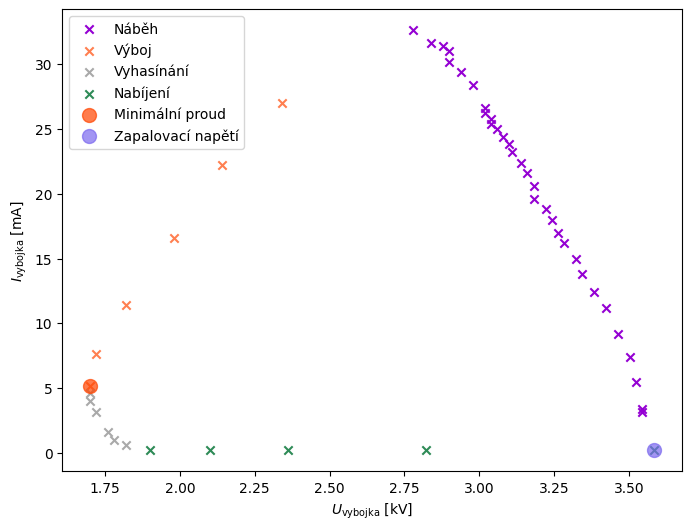

In [141]:
v_a_charakteristika = pd.DataFrame.from_dict({
    "U_vybojka [kV]": (voltamper["U_mer [V]"]*(1 + R_D1/R_D2) - voltamper["U_RI [V]"])/1000,
    "I_vybojka [mA]": (voltamper["U_RI [V]"]/R_I)*1000})

v_a_charakteristika.to_excel("voltamperova_charakteristika.xlsx")
nabeh = v_a_charakteristika.iloc[:32]
vyboj = v_a_charakteristika.iloc[32:38]
vyhasinani = v_a_charakteristika.iloc[38:44]
min_proud = v_a_charakteristika.iloc[37]
nabijeni = v_a_charakteristika.iloc[44:49]
zapal_napeti = v_a_charakteristika.iloc[48]

voltamperova_charakteristika = plt.figure(figsize=(8,6))
plt.scatter(nabeh["U_vybojka [kV]"], nabeh["I_vybojka [mA]"], 
            marker="x", color="darkviolet",
            label="Náběh")
plt.scatter(vyboj["U_vybojka [kV]"], vyboj["I_vybojka [mA]"], 
            marker="x", color="coral",
            label="Výboj")
plt.scatter(vyhasinani["U_vybojka [kV]"], vyhasinani["I_vybojka [mA]"],
            marker="x", color="darkgrey",
            label="Vyhasínání")
plt.scatter(nabijeni["U_vybojka [kV]"], nabijeni["I_vybojka [mA]"],
            marker="x", color="seagreen",
            label="Nabíjení")
plt.scatter(min_proud["U_vybojka [kV]"], min_proud["I_vybojka [mA]"], 
            marker="o", alpha=0.7, color="orangered", s=100,
            label="Minimální proud")
plt.scatter(zapal_napeti["U_vybojka [kV]"], zapal_napeti["I_vybojka [mA]"],
            marker="o", alpha=0.7, color="mediumslateblue", s=100,
            label="Zapalovací napětí")
plt.xlabel("$U_\\mathrm{{vybojka}}$ [kV]")
plt.ylabel("$I_\\mathrm{{vybojka}}$ [mA]")
plt.legend()
voltamperova_charakteristika.savefig("./img/voltamperova_charakteristika.pdf")


3. Graf závislosti okamžitého výkonu laserového impulsu na čase.


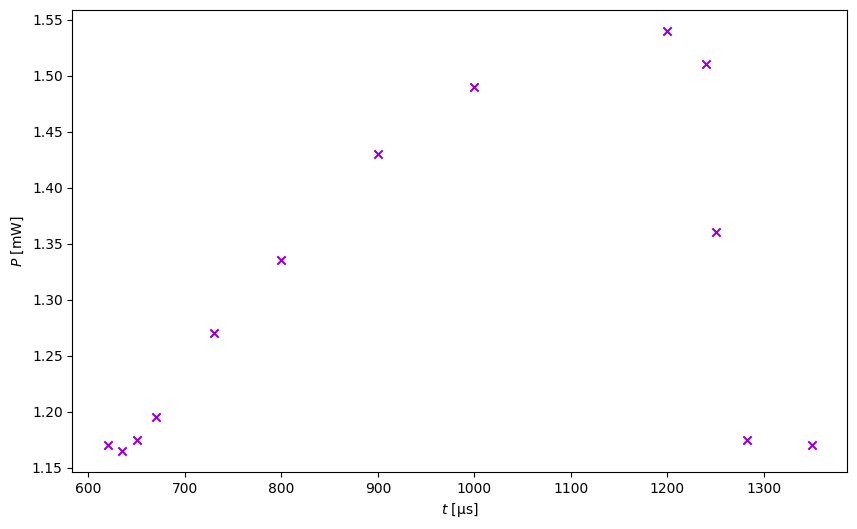

In [134]:
P = (fotonka["U_F [V]"]/(R_F*FOT))*1000 # mW 

cas_vykon = plt.figure(figsize=(10,6))
plt.scatter(fotonka["t [\\mu s]"], P,
            marker="x", color="darkviolet")
plt.xlabel("$t~\\mathrm{{[\\mu s]}}$")
plt.ylabel("$P~\\mathrm{{[mW]}}$")

cas_vykon.savefig("./img/cas_vykon.pdf")


4. Graf závislosti výstupního výkonu laseru na proudu trubicí.

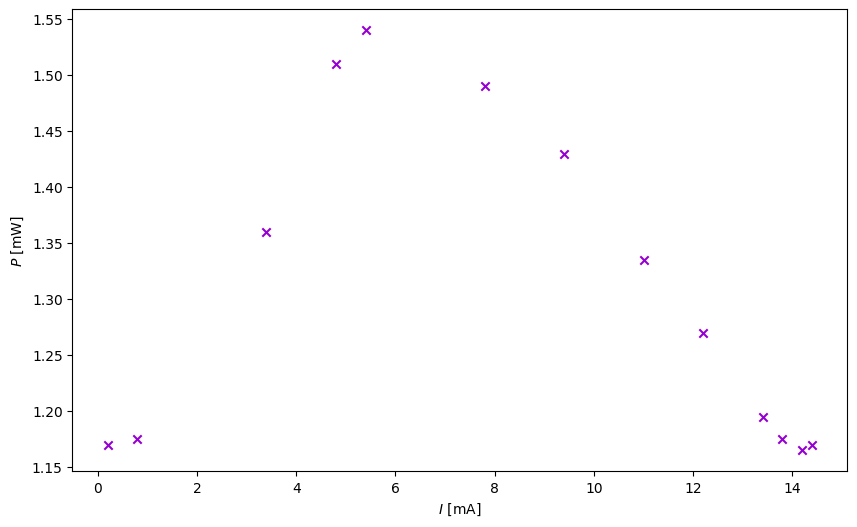

In [136]:
I_vybojka_fot = (fotonka["U_RI [V]"]/R_I)*1000 # mA

proud_vykon = plt.figure(figsize=(10,6))
plt.scatter(I_vybojka_fot, P,
            marker="x", color="darkviolet")
plt.xlabel("$I~\\mathrm{{[mA]}}$")
plt.ylabel("$P~\\mathrm{{[mW]}}$")
proud_vykon.savefig("./img/proud_vykon.pdf")


